Dalam bagian ini akan dipelajari beberapa model machine learning untuk menyelesaikan permasalahan regressi dan metrics untuk melakukan evaluasi model. Beberapa model yang akan dipelajari di dalam bagian ini diantaranya yaitu :
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. Gradient Bosting Regressor
6. KNN Regressor

### Using Synthetic Data

In [2]:
# Linear Dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

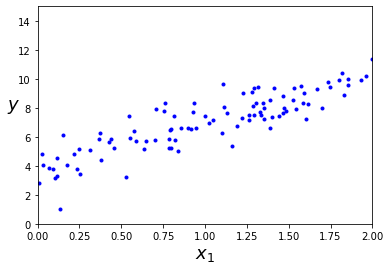

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.79947198]), array([[3.18563679]]))

In [5]:
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)

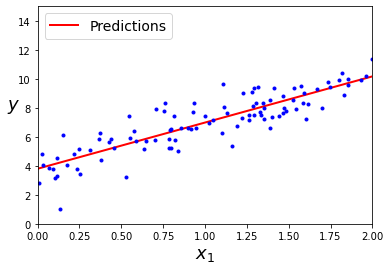

In [6]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [34]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

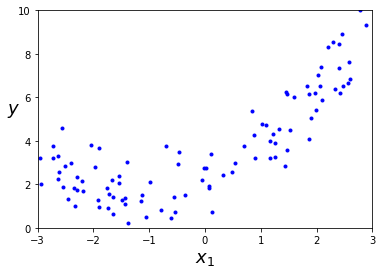

In [35]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.69863062]), array([[1.00484957]]))

In [37]:
y_predict = lin_reg.predict(X)

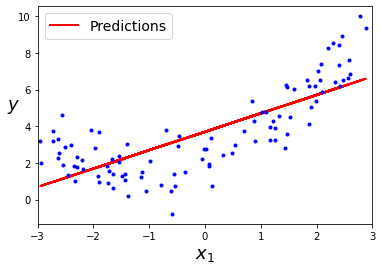

In [39]:
plt.plot(X, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.xlim(-3, 3)
plt.show()

No handles with labels found to put in legend.


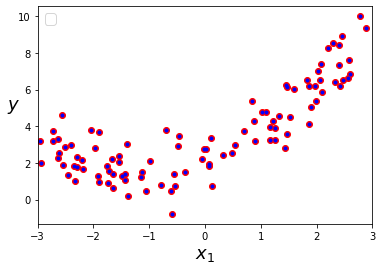

In [42]:
tree = DecisionTreeRegressor(random_state=42, )
tree.fit(X, y)

y_pred = tree.predict(X)

plt.plot(X, y_pred, "ro")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.xlim(-3, 3)
plt.show()

### Using Real World Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [16]:
data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
median = data["total_bedrooms"].median()
data["total_bedrooms"].fillna(median, inplace=True)
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]

In [17]:
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

X_num = X.select_dtypes(exclude=["object"])
X_cat = X.select_dtypes(include=["object"])

onehot = OneHotEncoder()
X_cat_trans = onehot.fit_transform(X_cat)
X_cat_trans = X_cat_trans.toarray()
X_cat = pd.DataFrame(X_cat_trans, columns=onehot.categories_[0])

scaler = StandardScaler()
X_num_trans = scaler.fit_transform(X_num)
X_num = pd.DataFrame(X_num_trans, columns=X_num.columns)

X = pd.concat([X_num, X_cat], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Linear Regression

In [59]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
mse_linreg = mean_squared_error(y_test, y_pred)
R2_linreg = r2_score(y_test, y_pred)
R2_linreg

0.5970176824350767

In [57]:
cross_val_score(linreg,X, y, cv=6)

array([0.35337014, 0.48705694, 0.61458719, 0.64584102, 0.50530737,
       0.70358842])

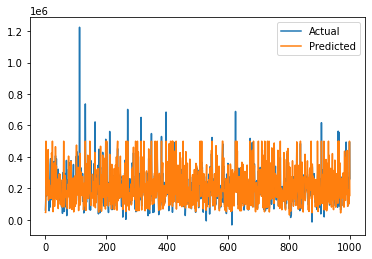

In [58]:
gr = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
gr = gr.reset_index()
gr = gr.drop(['index'],axis=1)
plt.plot(gr[:1000])
plt.legend(['Actual','Predicted'])

### Decission Tree Regreesion

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
mse_dtree = mean_squared_error(y_test, y_pred)
R2_dtree = r2_score(y_test, y_pred)
R2_dtree

0.6059101864551737

In [32]:
cross_val_score(tree,X ,y , cv=4)

array([0.07054184, 0.47514466, 0.44266435, 0.47009603])

### Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred)
R2_forest = r2_score(y_test, y_pred)
R2_forest

0.8063455010315974

In [62]:
print('Feature importances:\n{}'.format(forest.feature_importances_)) 

Feature importances:
[5.78631847e-02 5.62553025e-02 4.42349311e-02 1.26780148e-02
 1.23041506e-02 1.14247785e-02 1.03639048e-02 4.81545216e-01
 2.58004537e-02 2.42275660e-02 1.21443861e-01 1.21864557e-03
 1.37497045e-01 1.08630662e-04 8.27396832e-04 2.20691888e-03]


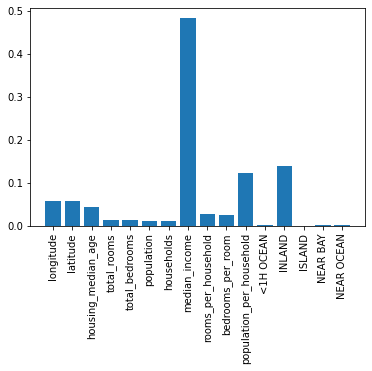

In [63]:
plt.bar(range(len(X.columns)), forest.feature_importances_, align='center')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.show()

In [37]:
cross_val_score(forest,X ,y , cv=4)

array([0.47398479, 0.7107446 , 0.64972609, 0.66494186])

### GradientBoosting Regressor

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred)
R2_gbr = r2_score(y_test, y_pred)
R2_gbr

0.7814772792919644

In [66]:
print('Feature importances:\n{}'.format(gbr.feature_importances_)) 

Feature importances:
[7.14037855e-02 3.71321501e-02 3.19643970e-02 1.94675438e-03
 2.07647161e-03 3.10788772e-04 1.62022308e-03 5.65833114e-01
 7.68772384e-03 3.61298226e-03 1.09428170e-01 2.63723490e-04
 1.57986566e-01 5.87129440e-05 5.87159384e-03 2.80284347e-03]


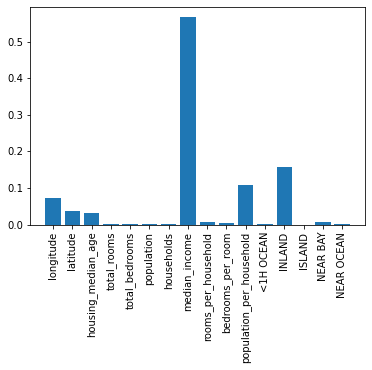

In [67]:
plt.bar(range(len(X.columns)), gbr.feature_importances_, align='center')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.show()

In [42]:
cross_val_score(gbr,X ,y , cv=4)

array([0.57321121, 0.66460721, 0.64875318, 0.67746737])

### Support Vector Regressor

In [68]:
from sklearn.svm import SVR

In [69]:
svr = SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred)
R2_svr = r2_score(y_test, y_pred)
R2_svr

-0.04344304601704341

### KNN Regressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred)
R2_knn = r2_score(y_test, y_pred)
R2_knn

0.7135574466318533

In [52]:
cross_val_score(knn,X ,y , cv=4)

array([0.55471023, 0.57296726, 0.47782716, 0.57471566])

### Conclusion

In [79]:
models = ['Linear Regression', 'Decision Tree Regressor' ,'Random Forest Regressor', 
          'Gradient Boosting Regressor','Support Vector Regressor', 'KNN Regressor']
tests_score = [R2_linreg, R2_dtree, R2_forest, R2_gbr, R2_svr, R2_knn]
compare_models = pd.DataFrame({ 'Algorithms': models, 'Tests Score': tests_score })
compare_models = compare_models.sort_values(by = 'Tests Score', ascending = False)
compare_models

,Algorithms,Tests Score
2,Random Forest Regressor,0.806346
3,Gradient Boosting Regressor,0.781477
5,KNN Regressor,0.713557
1,Decision Tree Regressor,0.605910
0,Linear Regression,0.597018
4,Support Vector Regressor,-0.043443


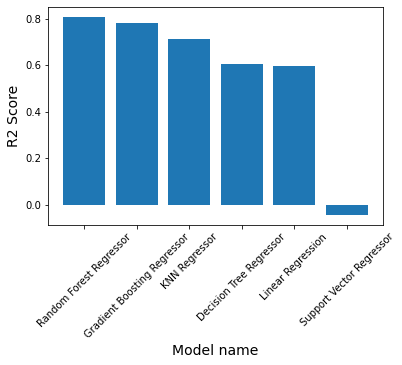

In [91]:
plt.bar(compare_models["Algorithms"], compare_models["Tests Score"])
plt.xticks(rotation=45)
plt.ylabel("R2 Score", fontsize=14)
plt.xlabel("Model name", fontsize=14)
plt.show()

In [93]:
models = ['Linear Regression', 'Decision Tree Regressor' ,'Random Forest Regressor', 
          'Gradient Boosting Regressor','Support Vector Regressor', 'KNN Regressor']
tests_score = [mse_linreg, mse_dtree, mse_forest, mse_gbr, mse_svr, mse_knn]
compare_models = pd.DataFrame({ 'Algorithms': models, 'Tests Score': tests_score })
compare_models = compare_models.sort_values(by = 'Tests Score', ascending = False)
compare_models

,Algorithms,Tests Score
4,Support Vector Regressor,1.367337e+10
0,Linear Regression,5.280716e+09
1,Decision Tree Regressor,5.164188e+09
5,KNN Regressor,3.753569e+09
3,Gradient Boosting Regressor,2.863541e+09
2,Random Forest Regressor,2.537666e+09


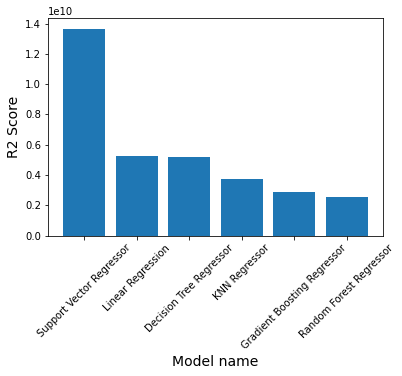

In [94]:
plt.bar(compare_models["Algorithms"], compare_models["Tests Score"])
plt.xticks(rotation=45)
plt.ylabel("mse score", fontsize=14)
plt.xlabel("Model name", fontsize=14)
plt.show()